# PLS Logistic Regression

Along with Penalized regression, PLS regression is the most classical method for assuming collinearity in a regression model, and can be used when the number of variables exceeds the number of observations. It can also be used in the presence of missing values.

In [1]:
import pandas as pd

credit2 = pd.read_csv('credit2.csv') 

test_size = 0.3

shuffled_data = credit2.sample(frac=1, random_state=42)

split_point = int(len(shuffled_data) * (1 - test_size))

train = shuffled_data.iloc[:split_point].reset_index().rename(columns={'index': 'id'})
test = shuffled_data.iloc[split_point:].reset_index().rename(columns={'index': 'id'})

In [2]:
train

,id,accounts,history_credit,object_credit,savings,employment_old,effort_rate,family_status,guarantees,home_old,...,other_credits,home_status,nb_credits,job_type,nb_of_dependants,telephone,age,duration_credit,amount_credit,presence_unpaid
0,521,CC < 0 euros,A32,Video-HIFI,< 500 euros,between 1 and 4 years,2,Female divorced/separated/married,Without guarantor,2,...,No external credit,owner,1,A173,1,A191,"[0.0, 25.0)","[15.0, 36.0)","[0.0, 4000.0)",1
1,737,CC < 0 euros,A32,New car,< 500 euros,between 1 and 4 years,3,Male single/married/widowed,Without guarantor,4,...,No external credit,owner,1,A172,2,A192,"[25.0, inf)","[15.0, 36.0)","[4000.0, inf)",0
2,740,CC < 0 euros,A31,New car,< 500 euros,for at least 4 years,2,Male single/married/widowed,Without guarantor,3,...,External credits,owner,1,A173,1,A191,"[25.0, inf)","[15.0, 36.0)","[0.0, 4000.0)",0
3,660,CC > 200 euros,A32,Video-HIFI,< 500 euros,between 1 and 4 years,3,Male single/married/widowed,Without guarantor,4,...,No external credit,Not owner,1,A173,1,A191,"[0.0, 25.0)","[0.0, 15.0)","[0.0, 4000.0)",0
4,411,No account,A34,Used car,< 500 euros,for at least 4 years,3,Male single/married/widowed,Without guarantor,2,...,No external credit,owner,2,A174,1,A192,"[25.0, inf)","[15.0, 36.0)","[4000.0, inf)",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,262,CC < 0 euros,A34,New car,< 500 euros,for at least 4 years,2,Male single/married/widowed,Without guarantor,4,...,No external credit,Not owner,3,A174,1,A192,"[25.0, inf)","[15.0, 36.0)","[4000.0, inf)",0
696,610,CC < 0 euros,A32,Interior,< 500 euros,Unemployed or < 1 year,4,Female divorced/separated/married,Without guarantor,3,...,No external credit,owner,1,A173,1,A191,"[0.0, 25.0)","[0.0, 15.0)","[0.0, 4000.0)",1
697,297,No account,A32,New car,No savings,for at least 4 years,4,Male single/married/widowed,Without guarantor,2,...,No external credit,owner,1,A172,1,A191,"[25.0, inf)","[0.0, 15.0)","[0.0, 4000.0)",0
698,414,CC < 0 euros,A32,New car,No savings,between 1 and 4 years,4,Female divorced/separated/married,Without guarantor,2,...,No external credit,owner,1,A173,1,A191,"[25.0, inf)","[15.0, 36.0)","[0.0, 4000.0)",1


In [3]:
# Create a design matrix with one-hot encoding for categorical variables (like R's model.matrix without intercept)
x = pd.get_dummies(train.drop("presence_unpaid", axis=1), drop_first=False)

# Convert the target variable to numeric
y = pd.to_numeric(train["presence_unpaid"])

In [4]:
# Assuming that in your test DataFrame the target column is named "presence_impaye".
# If your column is instead named "presence_unpaid", update the target_column accordingly.
target_column = "presence_unpaid"

# Create the design matrix: drop the target column and convert categorical variables to dummy/indicator variables.
xt = pd.get_dummies(test.drop(columns=[target_column]), drop_first=False)
yt = test[target_column]

print("Design matrix shape:", xt.shape)
print("Target vector shape:", yt.shape)

Design matrix shape: (300, 54)
Target vector shape: (300,)


PLS logistic regression is called by the function with the same name as the package, specifying the name of the variable to be explained, the explanatory variables, the number nt of components extracted, the name “dataPredictY” of the test sample and the type of model required, in this case logistic.

In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Exemple : pipeline avec standardisation et régression logistique
pipeline = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', C=1.5, solver='lbfgs', max_iter=1000))
pipeline.fit(x, y)

# Pour obtenir les coefficients du modèle ajusté sur les données standardisées :
# Récupérer la partie régression du pipeline
model = pipeline.named_steps['logisticregression']
std_coefs = model.coef_[0]
print("Standardized coefficients:", std_coefs)


Standardized coefficients: [ 0.03938312  0.29479613  0.04569789  0.21544362  0.08936373  0.32497465
  0.00087005  0.22858784 -0.5057018   0.12981146  0.15652916  0.14069961
 -0.04590271 -0.25351786 -0.04219037 -0.0331221   0.02387159  0.18342908
 -0.10227406  0.11135997 -0.21876102 -0.04675785  0.20333975 -0.05368418
 -0.19561037  0.0345399   0.07047659 -0.0964556   0.09352565  0.1969983
 -0.18311502 -0.0997021   0.0997021   0.02124217 -0.0531928   0.08134327
 -0.04028701  0.1463155  -0.1463155   0.03730358 -0.03730358  0.05811297
 -0.02717405 -0.04887242  0.07604598  0.05261214 -0.05261214  0.05023389
 -0.05023389 -0.23588386  0.05068614  0.23642055 -0.12383345  0.12383345]


In [6]:
# Importation des bibliothèques nécessaires pour l'analyse statistique et la modélisation
import numpy as np
import statsmodels.api as sm
from sklearn.cross_decomposition import PLSRegression

# Définition des données d'entrée
# x : matrice des prédicteurs d'entraînement, de dimension (n_samples x n_features)
# y : vecteur cible binaire (0/1), de dimension (n_samples,)
# xt : matrice des nouveaux prédicteurs pour lesquels on souhaite faire des prédictions

# Ajustement du modèle PLS (Partial Least Squares)
# Le modèle PLS est utilisé pour réduire la dimensionnalité des données tout en préservant la variance
# et la covariance entre les prédicteurs et la variable cible. Il extrait des composantes latentes
# qui maximisent la covariance entre x et y.
pls = PLSRegression(n_components=1)
X_scores = pls.fit_transform(x, y)[0]  # X_scores représente les scores des composantes latentes

# Ajustement du modèle GLM (Generalized Linear Model) pour la régression logistique
# La régression logistique est un cas particulier de GLM où la variable cible suit une distribution binomiale.
# On utilise les scores PLS comme prédicteurs dans le modèle logistique.
X_scores_const = sm.add_constant(X_scores)  # Ajout d'une constante pour inclure l'interception
glm_binom = sm.GLM(y, X_scores_const, family=sm.families.Binomial())  # Modèle GLM avec famille binomiale
pls_glm_logistic = glm_binom.fit()  # Ajustement du modèle

# Affichage du résumé du modèle
# Le résumé fournit des informations statistiques sur les coefficients estimés, leur significativité,
# et d'autres métriques d'ajustement du modèle.
print(pls_glm_logistic.summary())

# Prédiction sur de nouvelles données
# Les nouveaux prédicteurs xt sont transformés en scores PLS, puis utilisés pour prédire les probabilités
# de la classe positive à l'aide du modèle logistique ajusté.
xt_scores = pls.transform(xt)
xt_scores_const = sm.add_constant(xt_scores)  # Ajout d'une constante pour l'interception
y_pred = pls_glm_logistic.predict(xt_scores_const)  # Prédiction des probabilités

# Stockage du modèle complet
# Le modèle PLS et le modèle GLM ajusté sont stockés pour une utilisation future.
pls1 = {"pls": pls, "glm": pls_glm_logistic}

# Affichage des prédictions
# Les probabilités prédites pour les nouvelles données xt sont affichées, indiquant la probabilité
# que chaque observation appartienne à la classe positive.
print("Prédictions (probabilités) sur xt :", y_pred)

                 Generalized Linear Model Regression Results                  
Dep. Variable:        presence_unpaid   No. Observations:                  700
Model:                            GLM   Df Residuals:                      698
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -343.44
Date:                Mon, 17 Mar 2025   Deviance:                       686.88
Time:                        22:00:46   Pearson chi2:                     666.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2099
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1240      0.103    -10.917      0.0

We then measure the area under the ROC curve on the test sample of the resulting PLS model

In [7]:
from sklearn.metrics import roc_auc_score

# Supposons que y_pred correspond à pls1.ValsPredictY en R, et y_test à test["presence_impaye"]
auc_value = roc_auc_score(test["presence_unpaid"], y_pred)
print("AUC:", auc_value)


AUC: 0.8295882107023411


In the book, the value obtained is quite high, but lower than the 0.784 area achieved with a ridge motor.

The classic adjustment criteria are rendered in the InfCrit component of the object created by the plsRglm function. These include the AIC, the BIC, the number of misclassifications (calculated by cross-validation), the sum of residual squares (RSS), equal to the square root of the mean squared error multiplied by the number of degrees of freedom, and the R² (sum of explained squares / total sum of squares).

In [8]:
print("AIC :", pls1["glm"].aic)
print("BIC :", pls1["glm"].bic_llf)

AIC : 690.8766352862372
BIC : 699.978795956324


We can display the coef of centered-reduced variables

In [9]:
print("Standardized coefficients:", std_coefs)

Standardized coefficients: [ 0.03938312  0.29479613  0.04569789  0.21544362  0.08936373  0.32497465
  0.00087005  0.22858784 -0.5057018   0.12981146  0.15652916  0.14069961
 -0.04590271 -0.25351786 -0.04219037 -0.0331221   0.02387159  0.18342908
 -0.10227406  0.11135997 -0.21876102 -0.04675785  0.20333975 -0.05368418
 -0.19561037  0.0345399   0.07047659 -0.0964556   0.09352565  0.1969983
 -0.18311502 -0.0997021   0.0997021   0.02124217 -0.0531928   0.08134327
 -0.04028701  0.1463155  -0.1463155   0.03730358 -0.03730358  0.05811297
 -0.02717405 -0.04887242  0.07604598  0.05261214 -0.05261214  0.05023389
 -0.05023389 -0.23588386  0.05068614  0.23642055 -0.12383345  0.12383345]


In [10]:
coeffs = pls1["glm"].params
print(coeffs)

const   -1.124030
x1      -0.754681
dtype: float64


In [11]:
print(pls1)

{'pls': PLSRegression(n_components=1), 'glm': <statsmodels.genmod.generalized_linear_model.GLMResultsWrapper object at 0x7400be985e40>}


In [12]:
from pprint import pprint
pprint(pls1)

{'glm': <statsmodels.genmod.generalized_linear_model.GLMResultsWrapper object at 0x7400be985e40>,
 'pls': PLSRegression(n_components=1)}


We can test the extraction of several components and measure the area under the ROC curve, but we find that it is less than the area of the single-component model.

In [13]:
import numpy as np
import statsmodels.api as sm
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import roc_auc_score

# On suppose que x, y, xt sont déjà définis et prétraités.
# x : matrice de design d'entraînement (numpy array)
# y : vecteur binaire de l'entraînement (numpy array)
# xt : matrice de design du test (numpy array)
# test["presence_impaye"] contient les vraies étiquettes du test.

# 1. Ajustement de la PLS avec 2 composantes sur l'ensemble d'entraînement
pls2 = PLSRegression(n_components=2)
# La méthode fit_transform renvoie les scores latents pour X (on ignore y_scores)
X_scores = pls2.fit_transform(x, y)[0]  # dimensions: (n_train, 2)

# 2. Ajustement du modèle GLM (régression logistique) sur les scores latents
# Ajout d'une constante (pour l'intercept)
X_scores_const = sm.add_constant(X_scores)
glm_binom = sm.GLM(y, X_scores_const, family=sm.families.Binomial())
pls2_glm_logistic = glm_binom.fit()

print(pls2_glm_logistic.summary())

# Prédiction sur le jeu de test : transformation des prédicteurs test via la PLS
xt_scores = pls2.transform(xt)  # dimensions: (n_test, 2)
xt_scores_const = sm.add_constant(xt_scores)
# Calcul des probabilités prédites pour la classe positive
y_pred = pls2_glm_logistic.predict(xt_scores_const)

pls2 = {"pls": pls2, "glm": pls2_glm_logistic}

# Calcul de l'AUC
auc_value = roc_auc_score(test["presence_unpaid"], y_pred)
print("AUC:", auc_value)


                 Generalized Linear Model Regression Results                  
Dep. Variable:        presence_unpaid   No. Observations:                  700
Model:                            GLM   Df Residuals:                      697
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -329.43
Date:                Mon, 17 Mar 2025   Deviance:                       658.85
Time:                        22:01:08   Pearson chi2:                     649.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2409
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1961      0.109    -11.012      0.0

In [14]:
import numpy as np
import statsmodels.api as sm
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import roc_auc_score

# Pour reproduire set.seed(235)
np.random.seed(235)

# Supposons que :
# - x est votre matrice de prédicteurs d'entraînement (array de forme (n_train, n_features))
# - y est votre vecteur cible d'entraînement (array de forme (n_train,))
# - xt est votre matrice de prédicteurs pour le test (array de forme (n_test, n_features))
# - test["presence_impaye"] contient les vraies étiquettes (0/1) pour l'ensemble test.

# 1. Ajustement de la PLS avec 3 composantes sur l'ensemble d'entraînement
pls3 = PLSRegression(n_components=3)
# La méthode fit_transform renvoie (X_scores, y_scores); ici, on récupère les scores pour x.
X_scores_train = pls3.fit_transform(x, y)[0]  # shape: (n_train, 3)

# 2. Ajustement du modèle GLM (régression logistique) sur les scores latents
# Ajout d'une constante pour modéliser l'intercept
X_scores_train_const = sm.add_constant(X_scores_train)
glm_binom = sm.GLM(y, X_scores_train_const, family=sm.families.Binomial())
pls3_glm = glm_binom.fit()

print(pls3_glm.summary())

# 3. Prédiction sur le jeu de test
# Transformer xt avec le modèle PLS pour obtenir ses scores latents
X_scores_test = pls3.transform(xt)  # shape: (n_test, 3)
X_scores_test_const = sm.add_constant(X_scores_test)
# Prédiction des probabilités pour la classe positive
y_pred = pls3_glm.predict(X_scores_test_const)

# 4. Calcul de l'AUC
auc_value = roc_auc_score(test["presence_unpaid"], y_pred)
print("AUC:", auc_value)


                 Generalized Linear Model Regression Results                  
Dep. Variable:        presence_unpaid   No. Observations:                  700
Model:                            GLM   Df Residuals:                      696
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -328.12
Date:                Mon, 17 Mar 2025   Deviance:                       656.23
Time:                        22:01:11   Pearson chi2:                     647.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2437
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1937      0.109    -10.994      0.0

In [15]:
import numpy as np
import statsmodels.api as sm
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import roc_auc_score

# Pour reproduire set.seed(235)
np.random.seed(235)

# Supposons que :
# - x est votre matrice de prédicteurs d'entraînement (array de forme (n_train, n_features))
# - y est votre vecteur cible d'entraînement (array de forme (n_train,))
# - xt est votre matrice de prédicteurs pour le test (array de forme (n_test, n_features))
# - test["presence_impaye"] contient les vraies étiquettes (0/1) pour l'ensemble test.

# 1. Ajustement de la PLS avec 3 composantes sur l'ensemble d'entraînement
pls4 = PLSRegression(n_components=4)
# La méthode fit_transform renvoie (X_scores, y_scores); ici, on récupère les scores pour x.
X_scores_train = pls4.fit_transform(x, y)[0]  # shape: (n_train, 3)

# 2. Ajustement du modèle GLM (régression logistique) sur les scores latents
# Ajout d'une constante pour modéliser l'intercept
X_scores_train_const = sm.add_constant(X_scores_train)
glm_binom = sm.GLM(y, X_scores_train_const, family=sm.families.Binomial())
pls4_glm = glm_binom.fit()

print(pls4_glm.summary())

# 3. Prédiction sur le jeu de test
# Transformer xt avec le modèle PLS pour obtenir ses scores latents
X_scores_test = pls4.transform(xt)  # shape: (n_test, 3)
X_scores_test_const = sm.add_constant(X_scores_test)
# Prédiction des probabilités pour la classe positive
y_pred = pls4_glm.predict(X_scores_test_const)

# 4. Calcul de l'AUC
auc_value = roc_auc_score(test["presence_unpaid"], y_pred)
print("AUC:", auc_value)


                 Generalized Linear Model Regression Results                  
Dep. Variable:        presence_unpaid   No. Observations:                  700
Model:                            GLM   Df Residuals:                      695
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -327.30
Date:                Mon, 17 Mar 2025   Deviance:                       654.60
Time:                        22:01:14   Pearson chi2:                     651.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2455
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2002      0.109    -11.003      0.0

Moreover, the extraction of the first 10 PLS components shows that the BIC is minimal for 2 components, the AIC for three components.

In [16]:
import numpy as np
import statsmodels.api as sm
from sklearn.cross_decomposition import PLSRegression

# Supposons que x, y, et xt sont déjà définis :
# x : matrice de prédicteurs d'entraînement (array ou DataFrame converti en array)
# y : vecteur cible d'entraînement (par exemple, 0/1)
# xt : matrice de prédicteurs pour lesquels vous souhaitez obtenir des prédictions

# 1. Ajustement de la PLS avec 10 composantes sur l'ensemble d'entraînement
pls10 = PLSRegression(n_components=10)
# fit_transform retourne un tuple (X_scores, y_scores); on conserve X_scores
X_scores_train = pls10.fit_transform(x, y)[0]  # dimensions : (n_train, 10)

# 2. Ajustement du modèle GLM (régression logistique) sur les scores latents
# Ajouter une constante pour modéliser l'intercept
X_scores_train_const = sm.add_constant(X_scores_train)
glm_binom = sm.GLM(y, X_scores_train_const, family=sm.families.Binomial())
plsm_glm = glm_binom.fit()

# 3. Prédiction sur de nouvelles données : transformation de xt via la PLS
X_scores_xt = pls10.transform(xt)  # dimensions : (n_test, 10)
X_scores_xt_const = sm.add_constant(X_scores_xt)
# Prédiction des probabilités pour la classe positive
ValsPredictY = plsm_glm.predict(X_scores_xt_const)

# On regroupe les résultats dans un dictionnaire, similaire à l'objet R 'plsm'
plsm = {"pls": pls10, "glm": plsm_glm, "ValsPredictY": ValsPredictY}

# Pour vérifier, vous pouvez afficher un résumé du modèle GLM :
print(plsm["glm"].summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:        presence_unpaid   No. Observations:                  700
Model:                            GLM   Df Residuals:                      689
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -326.66
Date:                Mon, 17 Mar 2025   Deviance:                       653.32
Time:                        22:01:17   Pearson chi2:                     650.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2469
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2055      0.110    -11.004      0.0

In [17]:
print("AIC :", plsm["glm"].aic)
print("BIC :", plsm["glm"].bic_llf)

AIC : 675.3196656914199
BIC : 725.3815493768974


We can also check the consistency of the coef signs and find that they are only consistent with a single extracted component. We compare the coef signs of PLS podels on one or two components, and find that these signs are opposite for 4 variables (6 here).

In [18]:
import numpy as np
import statsmodels.api as sm
from sklearn.cross_decomposition import PLSRegression

# Supposons que:
# x       : matrice de prédicteurs d'entraînement (numpy array ou DataFrame converti en array)
# y       : vecteur cible d'entraînement (par exemple, des valeurs 0/1)
# xt      : matrice de prédicteurs pour lesquels vous souhaitez obtenir des prédictions (numpy array)

# 1. Ajustement de la PLS avec 2 composantes sur l'ensemble d'entraînement
pls2 = PLSRegression(n_components=2)
# La méthode fit_transform renvoie un tuple (X_scores, y_scores); on récupère les scores latents pour x.
X_scores_train = pls2.fit_transform(x, y)[0]  # dimensions: (n_train, 2)

# 2. Ajustement du modèle GLM (régression logistique) sur ces scores latents
# On ajoute une constante pour modéliser l'intercept
X_train_const = sm.add_constant(X_scores_train)
glm_binom = sm.GLM(y, X_train_const, family=sm.families.Binomial())
pls2_glm = glm_binom.fit()

# 3. Prédiction sur le jeu de test : transformer xt via la PLS
X_scores_test = pls2.transform(xt)  # dimensions: (n_test, 2)
X_test_const = sm.add_constant(X_scores_test)
ValsPredictY = pls2_glm.predict(X_test_const)

# Regroupons le tout dans un dictionnaire pour reproduire l'objet R 'pls2'
pls2_model = {"pls": pls2, "glm": pls2_glm, "ValsPredictY": ValsPredictY}

# Afficher un résumé du modèle GLM pour vérification
print(pls2_model["glm"].summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:        presence_unpaid   No. Observations:                  700
Model:                            GLM   Df Residuals:                      697
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -329.43
Date:                Mon, 17 Mar 2025   Deviance:                       658.85
Time:                        22:01:22   Pearson chi2:                     649.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2409
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1961      0.109    -11.012      0.0

In [19]:
pls1_coeffs = pls1["glm"].params
pls2_coeffs = pls2_glm.params

In [30]:
pls1_coeffs

const   -1.124030
x1      -0.754681
dtype: float64

In [31]:
pls2_coeffs

const   -1.196070
x1      -0.798166
x2       0.371048
dtype: float64

In [29]:
# Aligner les deux Series en utilisant l'intersection de leurs index
# Cette ligne trouve les index communs entre les coefficients de pls1 et pls2
common_index = pls1_coeffs.index.intersection(pls2_coeffs.index)

# Calculer le masque sur ces index communs
# Cette ligne crée un masque booléen où le produit des coefficients de pls1 et pls2 est négatif
mask = (pls1_coeffs.loc[common_index] * pls2_coeffs.loc[common_index]) < 0

# Extraire les noms des variables (index) pour lesquels le produit est négatif
row_names = common_index[mask]
print(row_names)

# Ce code commence par trouver les index communs entre deux séries de coefficients, 'pls1_coeffs' et 'pls2_coeffs'.
# Ensuite, il crée un masque booléen pour identifier les index où le produit des coefficients correspondants est négatif.
# Enfin, il extrait et affiche les noms des variables (index) pour lesquels ce produit est négatif.


Index([], dtype='object')


In [40]:
mask = (pls1_coeffs * pls2_coeffs) < 0
row_names = pls1_coeffs.index[mask]
print(row_names)

IndexError: boolean index did not match indexed array along axis 0; size of axis is 2 but size of corresponding boolean axis is 3

In [22]:
# Aligner les deux Series en utilisant l'intersection de leurs index
# Cette ligne trouve les index communs entre les coefficients de pls1 et pls2
common_index = pls1_coeffs.index.intersection(pls2_coeffs.index)

# Calculer le masque sur ces index communs
# Cette ligne crée un masque booléen où le produit des coefficients de pls1 et pls2 est négatif
mask = (pls1_coeffs.loc[common_index] * pls2_coeffs.loc[common_index]) < 0

# Extraire les coefficients de pls1 pour lesquels le produit est négatif
# Cette ligne sélectionne les coefficients de pls1 pour lesquels le produit avec les coefficients de pls2 est négatif
selected_coeffs = pls1_coeffs.loc[common_index][mask]
print(selected_coeffs)

Series([], dtype: float64)


In [23]:
# Supposons que 'pls1_coeffs' et 'pls2_coeffs' sont deux pandas Series
# dont les index représentent les noms des variables.

# Aligner les index communs
common_index = pls1_coeffs.index.intersection(pls2_coeffs.index)

# Calculer le masque pour lequel le produit est négatif
mask = (pls1_coeffs.loc[common_index] * pls2_coeffs.loc[common_index]) < 0

# Sélectionner les coefficients de pls2 pour lesquels le produit est négatif
selected_pls2_coeffs = pls2_coeffs.loc[common_index][mask]
print(selected_pls2_coeffs)

Series([], dtype: float64)


In [24]:
import pandas as pd

# Calcul de la table de contingence normalisée par ligne
prop_table = pd.crosstab(train['object_credit'], train['presence_unpaid'], normalize='index')

print(prop_table)


presence_unpaid         0         1
object_credit                      
Business         0.647059  0.352941
Education        0.833333  0.166667
Interior         0.668750  0.331250
New car          0.649682  0.350318
Other            0.666667  0.333333
Studies          0.609756  0.390244
Used car         0.808824  0.191176
Video-HIFI       0.774869  0.225131


We can check that the sign of each coef of pls1$Coeffs is always equal to the sign of the correlation coef of the cooresponding predictor with the variable to be explained. Simply check that the following quantities are always positive, since they are the term-by-term product of the vector cor(x,y) of correlation coefficients and the vector pls1Coeffs[-1] of PLS coefficients (excluding the model constant). On the contrary, we have negative signs in cor(x,y)*pls2Coeffs[-1].

In [44]:
coeffs_predictors = pls1_coeffs[1:]


In [45]:
coeffs_predictors

x1   -0.754681
dtype: float64

In [57]:
import numpy as np

# Conversion de x et y en tableaux NumPy
if hasattr(x, 'to_numpy'):
    x_arr = x.to_numpy()
else:
    x_arr = np.array(x)

if hasattr(y, 'to_numpy'):
    y_arr = y.to_numpy()
else:
    y_arr = np.array(y)

# S'assurer que x_arr est bien 2D
if x_arr.ndim == 1:
    x_arr = x_arr.reshape(-1, 1)

# S'assurer que y_arr est 1D (si ce n'est pas déjà le cas)
if y_arr.ndim > 1:
    y_arr = y_arr.flatten()

# Afficher les dimensions pour vérifier
print("x_arr.shape:", x_arr.shape)
print("y_arr.shape:", y_arr.shape)

# Calcul de la corrélation pour chaque colonne de x avec y
corrs = []
for i in range(x_arr.shape[1]):
    col = x_arr[:, i]
    
    # Vérifier si col ou y_arr sont constants (ou réduits à un scalaire)
    if np.isscalar(col) or np.isscalar(y_arr) or np.allclose(col, col[0]) or np.allclose(y_arr, y_arr[0]):
        corr_val = 0.0
    else:
        c = np.corrcoef(col, y_arr)
        # Vérifier que c a la forme attendue (2x2)
        if c.shape == (2, 2):
            corr_val = c[0, 1]
        else:
            corr_val = 0.0
    corrs.append(corr_val)

corrs = np.array(corrs)

# Extraction des coefficients hors intercept (pls1_coeffs[1:])
coeffs_predictors = pls1_coeffs[1:]

if corrs.shape != coeffs_predictors.shape:
    raise ValueError(f"Incompatibilité de dimensions : corrs.shape={corrs.shape} et coeffs_predictors.shape={coeffs_predictors.shape}")

# Calcul du produit élément par élément
result = corrs * coeffs_predictors

print("Corrélations multipliées par les coefficients :", result)


x_arr.shape: (700, 54)
y_arr.shape: (700,)


AttributeError: 'float' object has no attribute 'shape'

In [39]:
import numpy as np

# Exemple avec des données fictives pour s'assurer que les dimensions sont cohérentes :
np.random.seed(0)

# Supposons que nous avons 100 échantillons et 5 variables prédictives
n_samples, n_features = 100, 5
x = np.random.randn(n_samples, n_features)  # matrice de prédicteurs
y = np.random.randn(n_samples)              # vecteur cible (continu pour l'exemple)

# Exemple de coefficients issus d'un modèle, avec un intercept en position 0
pls1_coeffs = np.array([0.5, 1.2, -0.8, 0.3, 2.1, -1.5])  # longueur = n_features + 1

# Calcul de la corrélation de chaque colonne de x avec y.
# Cela produira un tableau de longueur n_features.
corrs = np.array([np.corrcoef(x[:, i], y)[0, 1] for i in range(x.shape[1])])

# Extraction des coefficients hors intercept (équivalent de pls1$Coeffs[-1] en R)
coeffs_predictors = pls1_coeffs[1:]  # tableau de longueur n_features

# Vérifier que les dimensions sont compatibles
if corrs.shape != coeffs_predictors.shape:
    raise ValueError("Les dimensions des corrélations et des coefficients ne correspondent pas.")

# Calcul du produit élément par élément
result = corrs * coeffs_predictors

print("Corrélations multipliées par les coefficients :", result)


Corrélations multipliées par les coefficients : [ 0.0109633  -0.02714655  0.05923668 -0.03829962  0.05568891]


In [53]:
# Afficher l'objet famille complet
print(pls1["glm"].family)

# Pour obtenir seulement le nom de la famille (par exemple "Binomial")
print(pls1["glm"].family.__class__.__name__)


Binomial


We asked for 1,000 bootstrap samples, which is generally considered the minimum to obtain correct confidence intervals, especially with the percentile method we'll see below. A bootpls1 object is created with the estimators of each coefficient calculated on each bootstrap sample.

In [54]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_decomposition import PLSRegression


def fit_pls_glm(x, y, n_components=1):
    """
    Ajuste un modèle PLS-GLM logistique sur les données x et y.
    Renvoie un dictionnaire contenant :
      - 'pls' : l'objet PLSRegression ajusté
      - 'glm' : l'objet GLMResults du modèle logistique ajusté sur les scores latents
    """
    # Ajuster la PLS avec n_components
    pls = PLSRegression(n_components=n_components)
    X_scores = pls.fit_transform(x, y)[0]  # On récupère les scores latents pour x
    # Ajouter une constante pour l'intercept
    X_scores_const = sm.add_constant(X_scores)
    # Ajuster un GLM logistique (famille Binomiale)
    glm_binom = sm.GLM(y, X_scores_const, family=sm.families.Binomial())
    glm_result = glm_binom.fit()
    
    return {"pls": pls, "glm": glm_result}

def statistic_pls_glm(model_obj):
    """
    Extrait la statistique désirée du modèle PLS-GLM.
    Ici, on choisit d'extraire les coefficients (l'intercept et les coefficients des scores latents)
    à partir du modèle GLM.
    """
    return model_obj["glm"].params

def bootstrap_pls_glm(x, y, n_components=1, R=1000, statistic_fn=statistic_pls_glm, random_state=None):
    """
    Réalise un bootstrap du modèle PLS-GLM.
    
    Paramètres :
      - x, y : données d'entraînement (x : array de dimension (n_samples, n_features), y : array de dimension (n_samples,))
      - n_components : nombre de composantes PLS à utiliser
      - R : nombre de répétitions bootstrap
      - statistic_fn : fonction pour extraire la statistique (ici les coefficients) à partir du modèle ajusté
      - random_state : pour la reproductibilité
      
    Renvoie un dictionnaire contenant :
      - "original" : les coefficients du modèle ajusté sur l'ensemble original
      - "bootstrap" : un DataFrame avec les coefficients obtenus pour chaque itération bootstrap
    """
    if random_state is not None:
        np.random.seed(random_state)
    
    # Ajuster le modèle sur l'ensemble original
    model_original = fit_pls_glm(x, y, n_components=n_components)
    orig_stats = statistic_pls_glm(model_original)
    
    boot_stats = []
    n_samples = x.shape[0]
    
    for i in range(R):
        # Rééchantillonnage avec remplacement
        indices = np.random.choice(n_samples, size=n_samples, replace=True)
        x_boot = x[indices]
        y_boot = y[indices]
        model_boot = fit_pls_glm(x_boot, y_boot, n_components=n_components)
        boot_stats.append(statistic_pls_glm(model_boot))
    
    # Convertir la liste des résultats bootstrap en DataFrame
    boot_df = pd.DataFrame(boot_stats)
    
    return {"original": orig_stats, "bootstrap": boot_df}

# Exemple d'utilisation
# Supposons que x et y sont vos données d'entraînement sous forme de numpy arrays.
# Par exemple, x de dimension (n_samples, n_features) et y de dimension (n_samples,)
# Vous devez remplacer ces lignes par vos données réelles.
np.random.seed(0)
n_samples, n_features = 100, 10
x = np.random.randn(n_samples, n_features)
y = (np.random.rand(n_samples) > 0.5).astype(int)

# Vous pouvez ajuster le modèle PLS-GLM avec 1 composante et réaliser un bootstrap avec R=1000 répétitions.
bootpls1 = bootstrap_pls_glm(x, y, n_components=1, R=1000, random_state=235)

# Afficher les coefficients du modèle original
print("Coefficients du modèle original :")
print(bootpls1["original"])

# Afficher un résumé des coefficients bootstrappés
print("\nStatistiques bootstrap (premières lignes) :")
print(bootpls1["bootstrap"].head())

# Vous pouvez ensuite calculer des intervalles de confiance, la moyenne, etc.
print("\nMoyenne des coefficients bootstrap :")
print(bootpls1["bootstrap"].mean())


Coefficients du modèle original :
[0.34286163 0.54223447]

Statistiques bootstrap (premières lignes) :
          0         1
0  0.338978 -0.735753
1  0.825969 -0.963483
2 -0.081798  0.786041
3  0.123014 -0.694970
4  0.364336  0.650701

Moyenne des coefficients bootstrap :
0    0.397462
1    0.137000
dtype: float64


In [55]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_decomposition import PLSRegression
import warnings

def fit_pls_glm(x, y, n_components=1):
    """
    Ajuste un modèle PLS-GLM logistique.
    Renvoie un dictionnaire avec :
      - 'pls' : l'objet PLSRegression ajusté
      - 'glm' : l'objet GLMResults du modèle logistique ajusté sur les scores latents
    """
    pls = PLSRegression(n_components=n_components)
    # Ajuster la PLS et récupérer les scores latents pour x
    X_scores = pls.fit_transform(x, y)[0]
    # Ajout d'une constante pour l'intercept
    X_scores_const = sm.add_constant(X_scores)
    glm_binom = sm.GLM(y, X_scores_const, family=sm.families.Binomial())
    glm_result = glm_binom.fit()
    return {"pls": pls, "glm": glm_result}

def statistic_pls_glm(model_obj):
    """
    Extrait la statistique désirée du modèle, ici les coefficients du modèle GLM.
    """
    return model_obj["glm"].params

def bootstrap_pls_glm(x, y, n_components=1, R=1000, statistic_fn=statistic_pls_glm, random_state=None):
    """
    Réalise un bootstrap pour le modèle PLS-GLM.
    
    Paramètres :
      - x, y : données d'entraînement (x : array de forme (n_samples, n_features), y : array de forme (n_samples,))
      - n_components : nombre de composantes PLS à utiliser
      - R : nombre de rééchantillonnages bootstrap
      - statistic_fn : fonction qui extrait la statistique du modèle (ici, les coefficients)
      - random_state : pour la reproductibilité
      
    Renvoie un dictionnaire avec :
      - "original" : la statistique extraite du modèle ajusté sur l'ensemble original
      - "bootstrap" : un DataFrame contenant la statistique pour chaque itération bootstrap
    """
    if random_state is not None:
        np.random.seed(random_state)
        
    # Ajustement sur l'ensemble original
    model_original = fit_pls_glm(x, y, n_components=n_components)
    orig_stats = statistic_pls_glm(model_original)
    
    boot_stats = []
    n_samples = x.shape[0]
    for i in range(R):
        indices = np.random.choice(n_samples, size=n_samples, replace=True)
        x_boot = x[indices]
        y_boot = y[indices]
        model_boot = fit_pls_glm(x_boot, y_boot, n_components=n_components)
        boot_stats.append(statistic_pls_glm(model_boot))
    
    boot_df = pd.DataFrame(boot_stats)
    return {"original": orig_stats, "bootstrap": boot_df}

# ----- Exemples d'utilisation -----

# Exemple de données fictives
np.random.seed(0)
n_samples, n_features = 100, 10
x = np.random.randn(n_samples, n_features)
y = (np.random.rand(n_samples) > 0.5).astype(int)

# Pour bootstraper un modèle avec 3 composantes (équivalent à nt=3)
# Première version (R=250) sur l'ensemble combiné (équivalent à boot(data=cbind(y,x), ...))
bootpls1 = bootstrap_pls_glm(x, y, n_components=3, R=250, random_state=235)
print("Bootpls1 (R=250) - modèle original coefficients:")
print(bootpls1["original"])
print("\nBootpls1 bootstrap summary:")
print(bootpls1["bootstrap"].describe())

# Ensuite, réaliser un bootstrap sur un modèle déjà ajusté (plsm) avec R=1000
# Ici, nous ajustons un modèle plsm avec 3 composantes
plsm = fit_pls_glm(x, y, n_components=3)
# Nous bootstrapons les données pour ce modèle, ce qui équivaut à bootplsglm(plsm, R=1000, ...)
bootpls1_1000 = bootstrap_pls_glm(x, y, n_components=3, R=1000, random_state=235)
print("\nBootpls1 (R=1000) - modèle original coefficients:")
print(bootpls1_1000["original"])
print("\nBootpls1 (R=1000) bootstrap summary:")
print(bootpls1_1000["bootstrap"].describe())

# Réaliser un bootstrap pour un modèle avec 2 composantes (équivalent à pls2)
pls2 = fit_pls_glm(x, y, n_components=2)
bootpls2 = bootstrap_pls_glm(x, y, n_components=2, R=1000, random_state=235)
print("\nBootpls2 (n_components=2) - modèle original coefficients:")
print(bootpls2["original"])
print("\nBootpls2 (n_components=2) bootstrap summary:")
print(bootpls2["bootstrap"].describe())

# Pour afficher des avertissements s'il y en a, vous pouvez vérifier le module warnings
# (En Python, les warnings sont généralement affichés automatiquement, ou vous pouvez les gérer avec warnings.filterwarnings)
warnings.warn("Vérifiez vos résultats bootstrap pour d'éventuels avertissements.")

# Enfin, pour reproduire l'équivalent de summary(coefs.plsRglmnp) en R,
# vous pouvez afficher un résumé statistique du DataFrame des coefficients bootstrappés :
print("\nRésumé statistique des coefficients bootstrap (equivalent de summary(coefs.plsRglmnp)):")
print(bootpls2["bootstrap"].describe())


Bootpls1 (R=250) - modèle original coefficients:
[ 0.34593565  0.54687435  0.15923459 -0.01005026]

Bootpls1 bootstrap summary:
                0           1           2           3
count  250.000000  250.000000  250.000000  250.000000
mean     0.402140    0.095956   -0.012311   -0.009472
std      0.235619    0.903079    0.345811    0.115997
min     -0.397499   -1.485778   -0.619059   -0.283775
25%      0.230896   -0.842456   -0.331216   -0.100152
50%      0.408050    0.598039   -0.127111   -0.008218
75%      0.559715    0.886654    0.301047    0.087117
max      1.289573    1.438595    0.651676    0.229305

Bootpls1 (R=1000) - modèle original coefficients:
[ 0.34593565  0.54687435  0.15923459 -0.01005026]

Bootpls1 (R=1000) bootstrap summary:
                 0            1            2            3
count  1000.000000  1000.000000  1000.000000  1000.000000
mean      0.410705     0.140540     0.031890    -0.002510
std       0.248254     0.898044     0.346111     0.117852
min      -0.397

/tmp/ipykernel_773/636305437.py:99: UserWarning: Vérifiez vos résultats bootstrap pour d'éventuels avertissements.
  warnings.warn("Vérifiez vos résultats bootstrap pour d'éventuels avertissements.")


In [56]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# Supposons que bootpls1 est un dictionnaire obtenu par bootstrap,
# et que bootpls1["bootstrap"] est un DataFrame contenant, en lignes, les réplicats bootstrap,
# et en colonnes, les coefficients pour chaque prédicteur (dans l'ordre utilisé en R).

# Par exemple, pour simuler, on peut créer un DataFrame fictif :
# (À remplacer par vos résultats bootstrap réels)
# bootpls1["bootstrap"] doit avoir autant de colonnes que de coefficients,
# par exemple, 50 colonnes (la première correspondant à l'intercept, puis 49 prédicteurs).
np.random.seed(0)
boot_df = pd.DataFrame(np.random.randn(1000, 50), 
                       columns=[f"coef_{i}" for i in range(50)])
bootpls1 = {"bootstrap": boot_df}

# 1. Bootstrap confidence intervals à 95 % (ici, on calcule l'intervalle percentile)
# Pour un prédicteur donné, par exemple la colonne correspondant à la 22ème variable (en R, index 22)
# Attention : en Python, l'indexation est à partir de 0.
pred_index = 21  # R: colonne 22, Python: index 21
ci_lower = bootpls1["bootstrap"].iloc[:, pred_index].quantile(0.025)
ci_upper = bootpls1["bootstrap"].iloc[:, pred_index].quantile(0.975)
print("95% CI (percentile) for predictor (column 22):", (ci_lower, ci_upper))

# Si vous souhaitez obtenir d'autres types d'intervalles (normal, basic, BCa), vous pouvez utiliser des packages spécialisés
# (par exemple, le package 'arch.bootstrap' ou 'scikits.bootstrap').

# 2. Afficher la structure de bootpls1 (similaire à str(bootpls1) en R)
print("\nStructure of bootpls1['bootstrap'] DataFrame:")
print(bootpls1["bootstrap"].info())

# 3. qnorm(0.95) en R => en Python, utilisez scipy.stats.norm.ppf
qnorm_95 = norm.ppf(0.95)
print("\nqnorm(0.95):", qnorm_95)

# 4. Moyenne des coefficients bootstrapés pour le prédicteur 37 (R: bootpls1$t[,37])
# En Python, si l'intercept est en colonne 0, le prédicteur 37 de R correspond à l'index 36.
mean_coef_37 = bootpls1["bootstrap"].iloc[:, 36].mean()
print("\nMean of bootstrap coefficients for predictor (column 37):", mean_coef_37)

# 5. Écart-type des coefficients bootstrapés pour le prédicteur 37 (R: sd(bootpls1$t[,37]))
sd_coef_37 = bootpls1["bootstrap"].iloc[:, 36].std()
print("SD of bootstrap coefficients for predictor (column 37):", sd_coef_37)

# 6. Range des quantiles (par défaut, 0%, 25%, 50%, 75%, 100%) pour le prédicteur 22 (R: range(quantile(bootpls1$t[,22])))
quantiles_22 = bootpls1["bootstrap"].iloc[:, pred_index].quantile([0, 0.25, 0.5, 0.75, 1])
range_quantiles_22 = (quantiles_22.min(), quantiles_22.max())
print("\nRange of default quantiles for predictor (column 22):", range_quantiles_22)

# 7. Quantiles spécifiques pour le prédicteur 22 (R: quantile(bootpls1$t[,22], c(0.90, 0.95, 0.975, 0.99)))
specific_quantiles = bootpls1["bootstrap"].iloc[:, pred_index].quantile([0.90, 0.95, 0.975, 0.99])
print("\nSpecific quantiles for predictor (column 22):")
print(specific_quantiles)


95% CI (percentile) for predictor (column 22): (np.float64(-1.8850608325011273), np.float64(1.9831308585021443))

Structure of bootpls1['bootstrap'] DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 50 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coef_0   1000 non-null   float64
 1   coef_1   1000 non-null   float64
 2   coef_2   1000 non-null   float64
 3   coef_3   1000 non-null   float64
 4   coef_4   1000 non-null   float64
 5   coef_5   1000 non-null   float64
 6   coef_6   1000 non-null   float64
 7   coef_7   1000 non-null   float64
 8   coef_8   1000 non-null   float64
 9   coef_9   1000 non-null   float64
 10  coef_10  1000 non-null   float64
 11  coef_11  1000 non-null   float64
 12  coef_12  1000 non-null   float64
 13  coef_13  1000 non-null   float64
 14  coef_14  1000 non-null   float64
 15  coef_15  1000 non-null   float64
 16  coef_16  1000 non-null   float64
 17  coef_17

In [59]:
import numpy as np
from scipy.stats import norm

# Supposons que boot_t0 et boot_t sont déjà définis :
# boot_t0 : numpy array de forme (n_coeffs,) avec l'estimation originale
# boot_t  : numpy array de forme (R, n_coeffs) avec les réplicats bootstrap

# Choix de l'indice pour le prédicteur d'intérêt
# En R, on accède à l'élément 37; en Python, cela correspond à l'indice 36 (0-indexed)
idx = 36

# Calcul de l'IC normal basé sur l'estimation originale
ci_lower_original = boot_t0[idx] - norm.ppf(0.975) * np.std(boot_t[:, idx], ddof=1)
ci_upper_original = boot_t0[idx] + norm.ppf(0.975) * np.std(boot_t[:, idx], ddof=1)

# Calcul de l'IC normal basé sur la moyenne des réplicats bootstrap (approximation 2*sd)
ci_lower_mean = np.mean(boot_t[:, idx]) - 2 * np.std(boot_t[:, idx], ddof=1)
ci_upper_mean = np.mean(boot_t[:, idx]) + 2 * np.std(boot_t[:, idx], ddof=1)

print("IC basé sur l'estimation originale:")
print("Lower bound: {:.3f}".format(ci_lower_original))
print("Upper bound: {:.3f}".format(ci_upper_original))

print("\nIC basé sur la moyenne bootstrap:")
print("Lower bound: {:.3f}".format(ci_lower_mean))
print("Upper bound: {:.3f}".format(ci_upper_mean))


NameError: name 'boot_t0' is not defined

In [60]:
import numpy as np
from scipy.stats import norm

# Pour l'exemple, supposons que nous avons 50 coefficients (n_coeffs = 50)
n_coeffs = 50

# Nombre de rééchantillonnages bootstrap (R)
R = 1000

# Exemple de données fictives :
# boot_t0 : coefficients originaux (par exemple, obtenus sur l'ensemble complet)
boot_t0 = np.random.randn(n_coeffs)

# boot_t : coefficients bootstrap, tableau de dimension (R, n_coeffs)
boot_t = np.random.randn(R, n_coeffs)

# Choix de l'indice pour le prédicteur d'intérêt
# En R, on utilise l'élément 37 (indexation commençant à 1); en Python, on utilisera l'indice 36 (0-indexed)
idx = 36

# Calcul de l'IC normal basé sur l'estimation originale :
ci_lower_original = boot_t0[idx] - norm.ppf(0.975) * np.std(boot_t[:, idx], ddof=1)
ci_upper_original = boot_t0[idx] + norm.ppf(0.975) * np.std(boot_t[:, idx], ddof=1)

# Calcul de l'IC normal basé sur la moyenne bootstrap (approximation à 2*sd)
ci_lower_mean = np.mean(boot_t[:, idx]) - 2 * np.std(boot_t[:, idx], ddof=1)
ci_upper_mean = np.mean(boot_t[:, idx]) + 2 * np.std(boot_t[:, idx], ddof=1)

print("IC basé sur l'estimation originale:")
print("Lower bound: {:.3f}".format(ci_lower_original))
print("Upper bound: {:.3f}".format(ci_upper_original))

print("\nIC basé sur la moyenne bootstrap:")
print("Lower bound: {:.3f}".format(ci_lower_mean))
print("Upper bound: {:.3f}".format(ci_upper_mean))


IC basé sur l'estimation originale:
Lower bound: -1.593
Upper bound: 2.328

IC basé sur la moyenne bootstrap:
Lower bound: -1.970
Upper bound: 2.031


In [61]:
import numpy as np
from scipy.stats import norm

# Supposons que boot_t0 et boot_t sont déjà définis.
# R: bootpls1$t0[37] devient en Python boot_t0[36]
idx = 36  # correspond à l'élément 37 en R

result = (2 * boot_t0[idx]) - np.mean(boot_t[:, idx]) - (norm.ppf(0.975) * np.std(boot_t[:, idx], ddof=1))

print("Résultat :", result)


Résultat : -1.2559747161499517


In [62]:
import numpy as np
from scipy.stats import norm

# Supposons que boot_t0 et boot_t sont déjà définis.
# R: bootpls1$t0[37] devient en Python boot_t0[36]
idx = 36  # correspond à l'élément 37 en R

result = (2 * boot_t0[idx]) - np.mean(boot_t[:, idx]) + (norm.ppf(0.975) * np.std(boot_t[:, idx], ddof=1))

print("Résultat :", result)

Résultat : 2.665160787047431


In [63]:
import numpy as np

# Supposons que boot_t est un array de forme (10000, n_coeffs)
idx = 36  # R: 37ème élément, Python: index 36
bootvar = np.mean((boot_t[:, idx] - np.mean(boot_t[:, idx]))**2)
print("Bootstrap variance:", bootvar)


Bootstrap variance: 0.9996155788561284


In [64]:
import numpy as np
from scipy.stats import norm

idx = 36  # 37ème élément en R correspond à l'indice 36 en Python

result = (2 * boot_t0[idx]) - np.mean(boot_t[:, idx]) - (norm.ppf(0.975) * np.sqrt(bootvar))
print("Result:", result)

Result: -1.2549941870805712


In [65]:
import numpy as np
from scipy.stats import norm

idx = 36  # 37ème élément en R correspond à l'indice 36 en Python

result = (2 * boot_t0[idx]) - np.mean(boot_t[:, idx]) + (norm.ppf(0.975) * np.sqrt(bootvar))
print("Result:", result)

Result: 2.6641802579780505


IC bootstrap basique (pivotal) basées sur l'estimation originale:
Lower bound: 0.4756525027294003
Upper bound: 4.445259456551758

IC bootstrap percentile:
Lower bound: -1.984678095096317
Upper bound: 1.9849288587260412


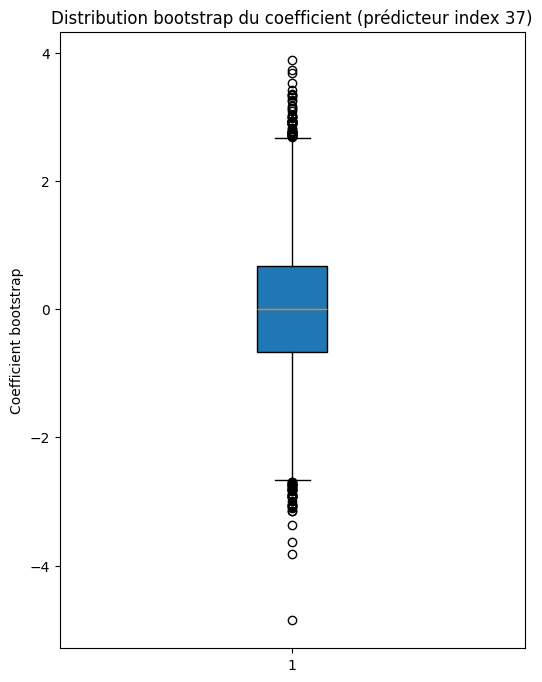

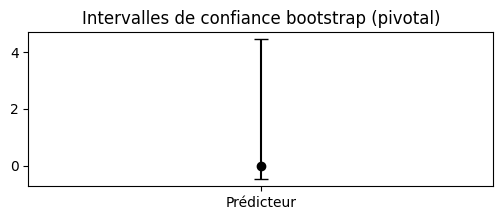


Résumé statistique (quantiles) du coefficient bootstrap:
2.5%: -1.985, 25%: -0.670, 50%: -0.001, 75%: 0.674, 97.5%: 1.983


In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# --- 1. Fonction pour calculer le quantile de type 6 ---
def quantile_type6(a, p):
    """
    Calcule le quantile de la distribution 1D 'a' selon la méthode type 6 de R.
    La méthode type 6 définit Q(p) = x[k] avec k = ceil((n+1)*p),
    où 'a' est trié par ordre croissant et l'indexation est 1-based (donc, en Python, on renvoie a[k-1]).
    """
    a_sorted = np.sort(a)
    n = len(a_sorted)
    # Calculer k = ceil((n+1)*p)
    k = int(np.ceil((n + 1) * p))
    # S'assurer que k est dans [1, n]
    k = min(max(k, 1), n)
    return a_sorted[k - 1]

# --- Exemple de données bootstrap ---
# Supposons que nous avons un bootstrap réalisé et que :
# boot_t0 est un array de coefficients originaux, et boot_t est un array de shape (R, n_coeffs)
# Pour cet exemple, nous simulons ces données
np.random.seed(0)
n_coeffs = 50   # nombre de coefficients (par exemple, intercept + 49 prédicteurs)
R = 10000       # nombre de réplicats bootstrap

# Simulation (à remplacer par vos résultats réels)
boot_t0 = np.random.randn(n_coeffs)        # coefficients originaux
boot_t = np.random.randn(R, n_coeffs)        # réplicats bootstrap

# Choix du prédicteur d'intérêt :
# En R, bootpls1$t0[37] correspond au 37ème élément (index 37, indexé à 1 en R)
# En Python, on utilise l'indice 36 (0-indexed)
idx = 36

# --- 2. Calcul de l'IC bootstrap basique (pivotal) ---
# Calcul de la borne inférieure et supérieure basées sur l'estimation originale
ci_lower_original = (2 * boot_t0[idx]) - quantile_type6(boot_t[:, idx], 0.975)
ci_upper_original = (2 * boot_t0[idx]) - quantile_type6(boot_t[:, idx], 0.025)

print("IC bootstrap basique (pivotal) basées sur l'estimation originale:")
print("Lower bound:", ci_lower_original)
print("Upper bound:", ci_upper_original)

# --- 3. Calcul de l'IC bootstrap percentile ---
ci_percentiles = (quantile_type6(boot_t[:, idx], 0.025), quantile_type6(boot_t[:, idx], 0.975))
print("\nIC bootstrap percentile:")
print("Lower bound:", ci_percentiles[0])
print("Upper bound:", ci_percentiles[1])

# --- 4. Boxplot de la distribution bootstrap pour le prédicteur choisi ---
plt.figure(figsize=(6, 8))
plt.boxplot(boot_t[:, idx], vert=True, patch_artist=True)
plt.title(f"Distribution bootstrap du coefficient (prédicteur index {idx+1})")
plt.ylabel("Coefficient bootstrap")
plt.show()

# --- 5. Plot des intervalles de confiance bootstrap ---
# Calcul des erreurs positives pour l'intervalle (assurez-vous qu'elles soient non négatives)
lower_err = np.abs(np.mean(boot_t[:, idx]) - ci_lower_original)
upper_err = np.abs(ci_upper_original - np.mean(boot_t[:, idx]))
plt.figure(figsize=(6, 2))
# Affichage sous forme de ligne avec les bornes
plt.errorbar(1, np.mean(boot_t[:, idx]), yerr=[[lower_err],
                                                 [upper_err]],
             fmt='o', color='black', capsize=5)
plt.xlim(0.5, 1.5)
plt.xticks([1], ['Prédicteur'])
plt.title("Intervalles de confiance bootstrap (pivotal)")
plt.show()

# --- 6. Affichage d'autres statistiques bootstrap (exemple, summary des quantiles) ---
quantiles = np.quantile(boot_t[:, idx], [0.025, 0.25, 0.5, 0.75, 0.975])
print("\nRésumé statistique (quantiles) du coefficient bootstrap:")
print(f"2.5%: {quantiles[0]:.3f}, 25%: {quantiles[1]:.3f}, 50%: {quantiles[2]:.3f}, 75%: {quantiles[3]:.3f}, 97.5%: {quantiles[4]:.3f}")


In [68]:
bootpls1

{'bootstrap':        coef_0    coef_1    coef_2    coef_3    coef_4    coef_5    coef_6  \
 0    1.764052  0.400157  0.978738  2.240893  1.867558 -0.977278  0.950088   
 1   -0.895467  0.386902 -0.510805 -1.180632 -0.028182  0.428332  0.066517   
 2    1.883151 -1.347759 -1.270485  0.969397 -1.173123  1.943621 -0.413619   
 3   -0.068242  1.713343 -0.744755 -0.826439 -0.098453 -0.663478  1.126636   
 4   -0.369182 -0.239379  1.099660  0.655264  0.640132 -1.616956 -0.024326   
 ..        ...       ...       ...       ...       ...       ...       ...   
 995  0.043379 -0.913535 -0.727501  0.188103 -0.670483  0.348664  0.724830   
 996 -0.820583  1.209698  0.477275 -0.288335  1.103792 -0.465606 -0.057287   
 997 -1.600970  1.252861 -0.571354 -0.169844 -0.096264  0.790794 -0.367574   
 998 -0.041317  0.732735 -0.415066 -0.369719  1.327831  1.130079  0.859513   
 999  0.145180 -1.364627 -1.318933  1.086900  1.140787 -0.773991  0.275747   
 
        coef_7    coef_8    coef_9  ...   coef_40

In [69]:
import numpy as np
import statsmodels.api as sm
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler

# Supposons que x et y sont vos données d'entraînement :
# x : array de dimensions (n_samples, n_features)
# y : array de dimensions (n_samples,)
# Par exemple, vous pouvez avoir :
# x = ... (vos prédicteurs)
# y = ... (la variable cible)

# 1. Standardisation des prédicteurs (équivalent de scale(x) en R)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# 2. Ajustement de la PLS avec 1 composante sur les données standardisées
pls1b = PLSRegression(n_components=1)
# fit_transform retourne (X_scores, y_scores); on récupère les scores latents pour x
X_scores = pls1b.fit_transform(x_scaled, y)[0]  # shape : (n_samples, 1)

# 3. Ajustement d'un modèle GLM logistique sur ces scores latents
# On ajoute une constante pour modéliser l'intercept
X_scores_const = sm.add_constant(X_scores)
glm_binom = sm.GLM(y, X_scores_const, family=sm.families.Binomial())
glm_result = glm_binom.fit()

# Création d'un objet regroupant les résultats (équivalent de pls1b en R)
pls1b_model = {"pls": pls1b, "glm": glm_result}

# 4. Extraction des coefficients
# - "Std.Coeffs" correspond aux coefficients du modèle GLM ajusté sur les scores latents
std_coeffs = glm_result.params  # par exemple, [intercept, gamma]

# Pour obtenir les coefficients sur l'échelle originale (raw coefficients),
# il faut "remonter" depuis l'espace des scores latents.
# On a : X_scores = x_scaled @ W, où W est le vecteur des poids (pls1b.x_weights_, shape: (n_features, 1)).
# Le modèle GLM est alors : logit(y) = intercept + gamma * X_scores.
# Ainsi, pour retrouver l'effet de chaque prédicteur dans x_scaled, on calcule :
#   beta_std = gamma * W    (coefficients sur x_scaled)
# Pour revenir à l'échelle originale, sachant que x_scaled = (x - mean)/std, il faut diviser par scaler.scale_.
gamma = glm_result.params[1]           # coefficient associé au score latent
W = pls1b.x_weights_.ravel()             # poids de la PLS, vecteur de taille n_features
# Coefficients sur l'échelle standardisée (de x_scaled)
std_coef_original = gamma * W  
# Pour obtenir les coefficients sur l'échelle originale, on divise par l'écart-type de x
raw_coeffs = std_coef_original / scaler.scale_
# L'intercept sur l'échelle originale se calcule en ajustant pour la standardisation :
raw_intercept = glm_result.params[0] - np.sum((scaler.mean_ / scaler.scale_) * std_coef_original)

# On regroupe l'intercept et les coefficients dans un seul vecteur :
raw_coeffs_full = np.concatenate(([raw_intercept], raw_coeffs))

# Affichage des résultats
print("Coefficients standardisés (Std.Coeffs) :", std_coeffs)
print("Coefficients sur l'échelle originale (Coeffs)  :", raw_coeffs_full)


Coefficients standardisés (Std.Coeffs) : [0.34286163 0.54223447]
Coefficients sur l'échelle originale (Coeffs)  : [ 0.28778409 -0.24000418 -0.17965021 -0.02842427  0.39001066  0.03967425
  0.09275066 -0.11281381 -0.03455791 -0.08912438  0.12416428]


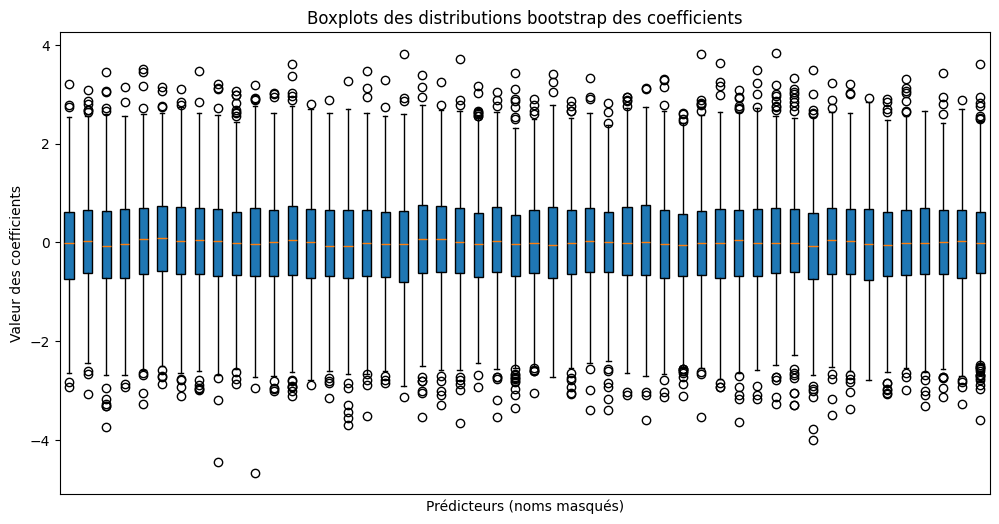

In [71]:
import matplotlib.pyplot as plt

# Supposons que bootpls1["bootstrap"] est votre DataFrame contenant les réplicats bootstrap,
# avec chaque colonne correspondant à un prédicteur.
data = bootpls1["bootstrap"]

plt.figure(figsize=(12, 6))
# Tracer un boxplot pour chaque colonne
plt.boxplot([data[col] for col in data.columns], patch_artist=True)
# Masquer les étiquettes de l'axe x (prednames=FALSE)
plt.xticks([])

plt.title("Boxplots des distributions bootstrap des coefficients")
plt.ylabel("Valeur des coefficients")
plt.xlabel("Prédicteurs (noms masqués)")
plt.show()


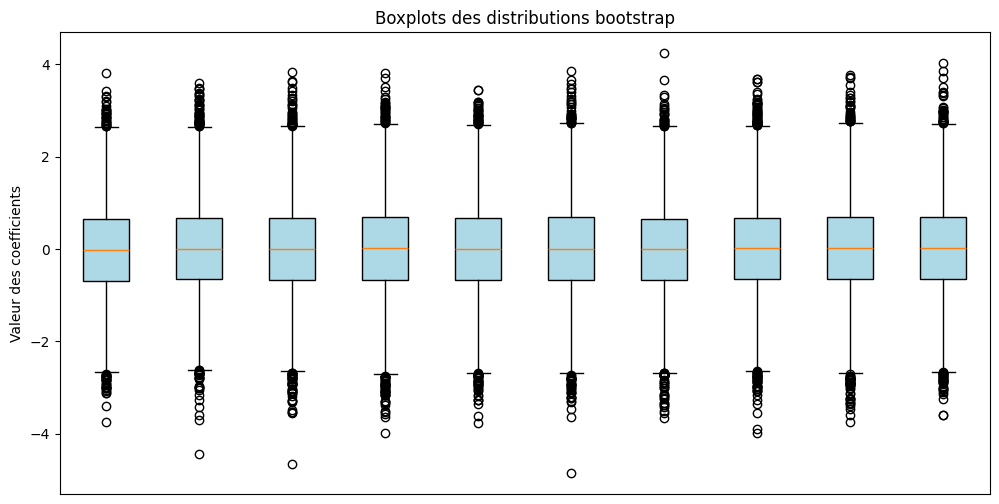

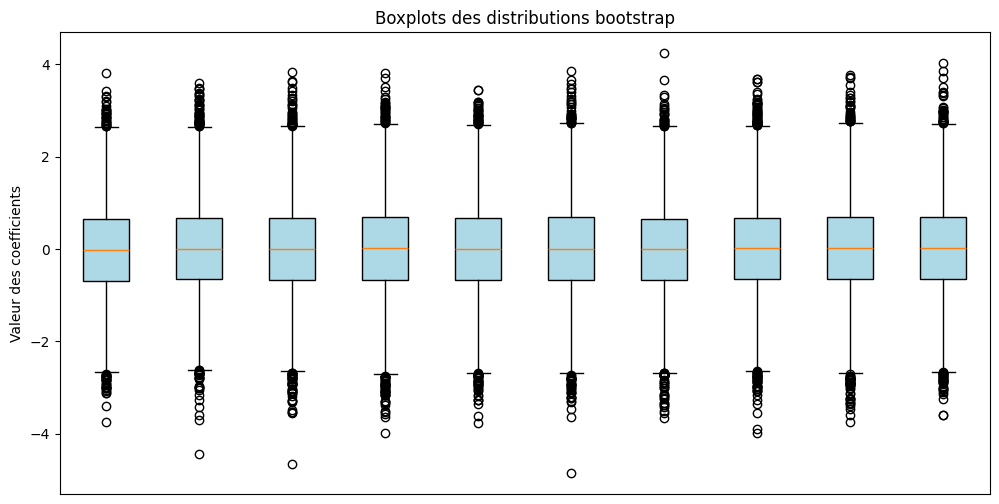

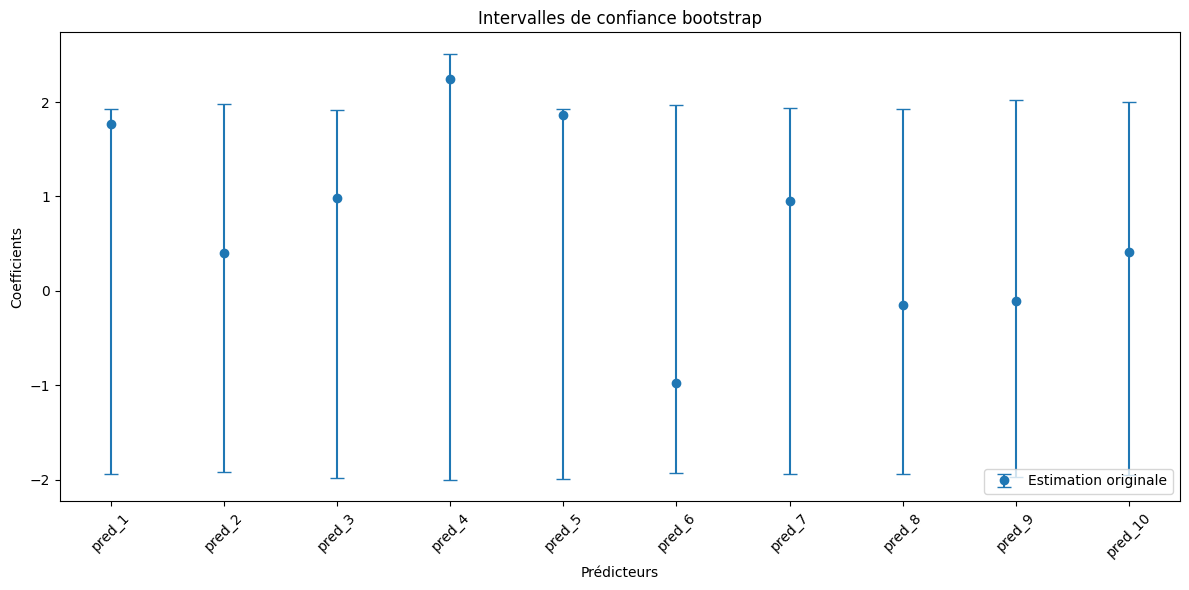

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import warnings

# -------------------------------
# 1. Fonction pour tracer les boxplots bootstrap
def plot_bootstrap_boxplots(boot_obj, prednames=False, articlestyle=False):
    """
    Trace des boxplots pour chaque prédicteur à partir des réplicats bootstrap.
    
    Parameters:
      - boot_obj: dictionnaire contenant la clé "bootstrap", un DataFrame où chaque colonne correspond
                  à la distribution bootstrap d'un coefficient.
      - prednames: booléen, si False, ne pas afficher les noms des prédicteurs sur l'axe des x.
      - articlestyle: booléen, pour appliquer un style particulier (ici, modifie la couleur des boîtes).
    """
    data = boot_obj["bootstrap"]
    plt.figure(figsize=(12, 6))
    # Choix du style pour les boxplots
    if articlestyle:
        boxprops = dict(facecolor="lightgreen")
    else:
        boxprops = dict(facecolor="lightblue")
    # On crée une liste des données pour chaque prédicteur
    box_data = [data[col] for col in data.columns]
    plt.boxplot(box_data, patch_artist=True, boxprops=boxprops)
    if not prednames:
        plt.xticks([])  # Masquer les noms des prédicteurs
    else:
        plt.xticks(ticks=range(1, len(data.columns)+1), labels=data.columns, rotation=45)
    plt.title("Boxplots des distributions bootstrap")
    plt.ylabel("Valeur des coefficients")
    plt.xlabel("Prédicteurs" if prednames else "")
    plt.show()

# -------------------------------
# 2. Fonction pour calculer les intervalles de confiance bootstrap par la méthode percentile
def confints_bootpls(boot_obj, alpha=0.05, typeBCa=False):
    """
    Calcule les intervalles de confiance bootstrap pour chaque prédicteur.
    
    Parameters:
      - boot_obj: dictionnaire contenant la clé "bootstrap" (DataFrame des réplicats).
      - alpha: niveau de signification (0.05 pour un IC à 95%).
      - typeBCa: booléen (ici, nous utilisons toujours la méthode percentile, typeBCa n'influence pas le calcul).
      
    Retourne un DataFrame dont l'index est ["Lower", "Upper"] et les colonnes sont les noms des prédicteurs.
    """
    data = boot_obj["bootstrap"]
    conf_dict = {}
    for col in data.columns:
        lower = data[col].quantile(alpha/2)
        upper = data[col].quantile(1 - alpha/2)
        conf_dict[col] = (lower, upper)
    conf_df = pd.DataFrame(conf_dict, index=["Lower", "Upper"])
    return conf_df

# -------------------------------
# 3. Fonction pour tracer les intervalles de confiance bootstrap
def plot_confints_bootpls(conf_df, legendpos="bottomright"):
    """
    Trace les intervalles de confiance bootstrap pour chaque prédicteur en superposant l'estimation originale.
    
    Parameters:
      - conf_df: DataFrame contenant les bornes "Lower" et "Upper" pour chaque prédicteur.
      - legendpos: position de la légende (ex. "bottomright" sera traduit en "lower right").
    """
    # Conversion de la position de légende
    loc_map = {"bottomright": "lower right"}
    loc = loc_map.get(legendpos, legendpos)
    
    predictors = conf_df.columns
    lower_bounds = conf_df.loc["Lower"].values
    upper_bounds = conf_df.loc["Upper"].values
    
    # Supposons que l'estimation originale des coefficients est contenue dans boot_obj["original"]
    # Nous demandons à l'utilisateur d'avoir un objet Series indexé par les mêmes colonnes
    # Pour cet exemple, nous supposons qu'une variable globale 'orig_coeffs' existe.
    if 'orig_coeffs' not in globals():
        raise ValueError("La variable 'orig_coeffs' (les coefficients originaux) doit être définie.")
    
    orig_vals = orig_coeffs[predictors].values
    
    x = np.arange(len(predictors))
    plt.figure(figsize=(12, 6))
    # Tracer les intervalles sous forme de barres d'erreur
    lower_diff = np.abs(orig_vals - lower_bounds)
    upper_diff = np.abs(upper_bounds - orig_vals)
    plt.errorbar(x, orig_vals, yerr=[lower_diff, upper_diff],
                 fmt='o', capsize=5, label="Estimation originale")
    plt.xticks(x, predictors, rotation=45)
    plt.xlabel("Prédicteurs")
    plt.ylabel("Coefficients")
    plt.title("Intervalles de confiance bootstrap")
    plt.legend(loc=loc)
    plt.tight_layout()
    plt.show()

# -------------------------------
# 4. Exemple d'utilisation global
# (Remplacez les objets bootpls1 par vos résultats bootstrap réels.)
#
# On suppose que bootpls1 est un dictionnaire contenant :
#   - "original": un objet pandas Series des coefficients originaux (avec index = noms des prédicteurs)
#   - "bootstrap": un DataFrame des réplicats bootstrap (colonnes = mêmes noms que dans "original")
#
# Par exemple, pour tester, vous pouvez simuler des données bootstrap comme suit :

# Simulation (à remplacer par vos résultats réels) :
np.random.seed(0)
n_preds = 10
R = 10000
orig_coeffs = pd.Series(np.random.randn(n_preds), index=[f"pred_{i+1}" for i in range(n_preds)])
boot_data = {f"pred_{i+1}": np.random.randn(R) for i in range(n_preds)}
boot_df = pd.DataFrame(boot_data)
bootpls1 = {"original": orig_coeffs, "bootstrap": boot_df}

# Maintenant, appel des fonctions équivalentes aux lignes R :
# Boxplots bootstrap avec prednames=FALSE et articlestyle=FALSE
plot_bootstrap_boxplots(bootpls1, prednames=False, articlestyle=False)
# Boxplots bootstrap avec prednames=FALSE (style par défaut)
plot_bootstrap_boxplots(bootpls1, prednames=False)

# Afficher les warnings (en Python, configurez les warnings pour qu'ils s'affichent toujours)
warnings.simplefilter("always")
# Pour obtenir de l'aide sur la fonction, vous pouvez taper dans le terminal :
# help(plot_bootstrap_boxplots)

# Calcul et tracé des intervalles de confiance bootstrap
# Note: Le paramètre typeBCa=True est mentionné mais ici nous utilisons la méthode percentile.
ci_df = confints_bootpls(bootpls1, typeBCa=True)
# Définir la variable globale orig_coeffs pour que plot_confints_bootpls l'utilise
# (dans cet exemple, orig_coeffs est déjà défini ci-dessus)
plot_confints_bootpls(ci_df, legendpos="bottomright")
